In [1]:
import copy as cp
import numpy as np
np.bool = np.bool_
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
import pyemma.coordinates as coor
import pyemma.plots as mplt
import pyemma
import pickle as pkl
import sklearn as skl
from sklearn.model_selection import train_test_split as splt
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cfm
import sys, os
sys.path.append('../0_python_modules/')
import navjeet_hist as nh
import metrics
import extras
from model import unsupervised_random_forest as urf

In [2]:
import warnings
warnings.filterwarnings("ignore", message="Call to deprecated function")
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [3]:
def clusters(hc, nids=range(2,11)):
    for h in nids:
        hl=extras.get_hc_dtraj(hc, nids=h)
        print(h,_clusters(hl))
def _clusters(hl):
    return {i:np.where(hl==i)[0].shape[0] for i in np.unique(hl)}

In [5]:
traj_data = [np.load(f'../2_jctc_urf/traj_specific_data/features_{i}.npy') for i in range(6)]
dists0 = np.loadtxt(f'../2_jctc_urf/traj_specific_data/distances0.xvg', comments=['@','#'], usecols=[3])

In [6]:
t4l_impure=0.44
t4l_weight = np.where(dists0<=0.6)[0].shape[0]/dists0.shape[0]

## pmt_alg = ef

In [5]:
clusters(np.load('../2_jctc_urf/saved_data_size_pmt/hc_permute_1.npy'))

2 {0: 4933, 1: 10479}
3 {0: 4933, 1: 5, 2: 10474}
4 {0: 4933, 1: 5, 2: 1, 3: 10473}
5 {0: 4933, 1: 5, 2: 1, 3: 2, 4: 10471}
6 {0: 5, 1: 1, 2: 2, 3: 10471, 4: 4843, 5: 90}
7 {0: 5, 1: 1, 2: 2, 3: 10471, 4: 4843, 5: 3, 6: 87}
8 {0: 1, 1: 2, 2: 10471, 3: 4843, 4: 3, 5: 87, 6: 3, 7: 2}
9 {0: 1, 1: 2, 2: 10471, 3: 4843, 4: 3, 5: 3, 6: 2, 7: 1, 8: 86}
10 {0: 1, 1: 2, 2: 4843, 3: 3, 4: 3, 5: 2, 6: 1, 7: 86, 8: 3, 9: 10468}


In [20]:
_clusters(np.load('1_ef2/saved_ef/dtrj_0.1.npy'))

{0: 4971, 1: 10441}

In [36]:
hists = []
extents = []
sizes = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
for s in sizes:
    fimp = np.load(f'1_ef2/saved_ef/fimp_{s}.npy')
    h1=[]
    e1=[]
    for f in fimp:
        f = f.argsort()[::-1][:200]
        tic2 = [t[:,f] for t in traj_data]
        tic2 = coor.tica(tic2, lag=700, dim=2).get_output()[0]
        hh = nh.hist_range(tic2, dists0, mini=0, maxi=0.6)
        h1.append(hh[4])
        e1.append(hh[:4])
    hists.append(h1)
    extents.append(e1)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [71]:
lc = [np.load(f'1_ef2/saved_ef/lc_{s}.npy') for s in sizes]
lc = np.mean(lc, axis=1), np.std(lc, axis=1)
lc

(array([0.99985196, 0.99975126, 0.99973461, 0.9998139 , 0.99965372,
        0.99978544, 0.99937383, 0.99973381, 0.99974646, 0.99956757]),
 array([1.20896284e-04, 7.67404492e-05, 1.32087581e-04, 1.04308893e-04,
        6.22711444e-05, 1.02182724e-04, 8.84160707e-05, 1.10644463e-04,
        6.83360691e-05, 6.33429639e-05]))

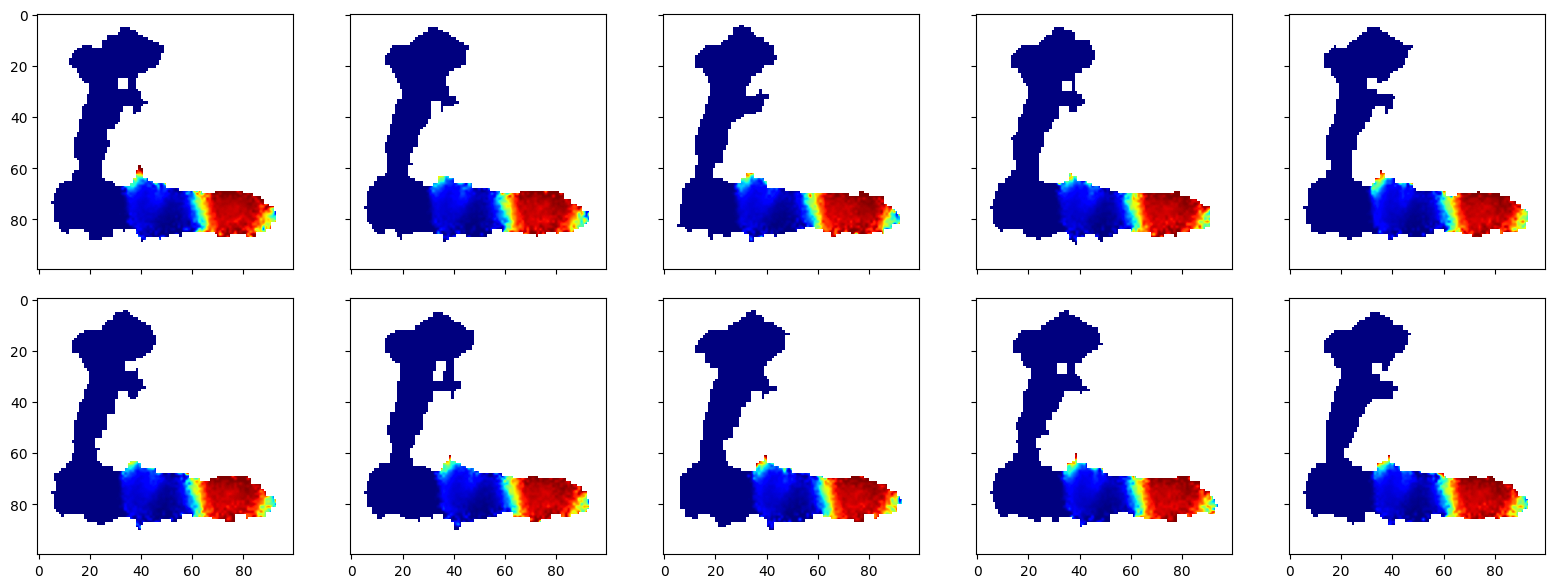

In [51]:
fig,ax=plt.subplots(2,5,figsize=(16,6), sharex=True, sharey=True)
plt.tight_layout()
ax=np.concatenate((ax))
for a,hh in enumerate(hists):
    ax[a].imshow(hh[0], vmin=0, vmax=1, cmap='jet', interpolation='gaussian')
plt.show()

In [54]:
ce = [
    [
        nh.classification_extent(j, cutoff=0.1, strategy='weighted',
                                output_type='jm', operation=2, jm_lower=t4l_weight, jm_impure=t4l_impure)
    for j in i]
for i in hists]
ce = np.mean(ce, axis=1), np.std(ce, axis=1)

(0.6, 0.8)

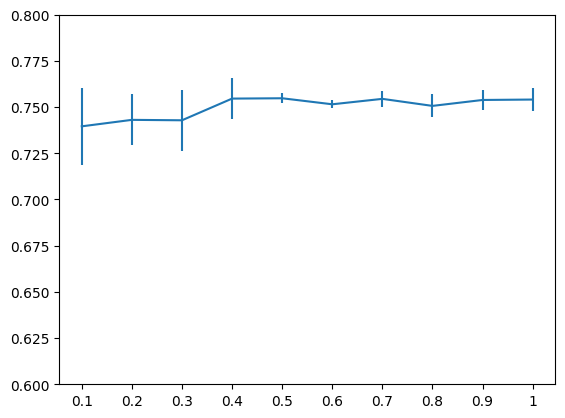

In [58]:
fig,ax=plt.subplots(1)
ax.errorbar(sizes, ce[0], yerr=ce[1])
ax.set_ylim(0.6,0.8)

## pmt_alg = fp

In [70]:
hists = []
extents = []
sizes = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1']
for s in sizes:
    fimp = np.load(f'2_fp2/saved_fp/fimp_{s}.npy')
    h1=[]
    e1=[]
    for f in fimp:
        f = f.argsort()[::-1][:200]
        tic2 = [t[:,f] for t in traj_data]
        tic2 = coor.tica(tic2, lag=700, dim=2).get_output()[0]
        hh = nh.hist_range(tic2, dists0, mini=0, maxi=0.6)
        h1.append(hh[4])
        e1.append(hh[:4])
    hists.append(h1)
    extents.append(e1)

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

calculate covariances:   0%|                                                                                  …

getting output of TICA:   0%|                                                                                 …

In [72]:
lc = [np.load(f'2_fp2/saved_fp/lc_{s}.npy') for s in sizes]
lc = np.mean(lc, axis=1), np.std(lc, axis=1)
lc

(array([0.99942304, 0.99962214, 0.99966188, 0.99975139, 0.99976625,
        0.99975138, 0.9993006 , 0.99971672, 0.99971168, 0.99941808]),
 array([1.34330196e-04, 7.26210433e-05, 5.37591994e-05, 4.46640460e-05,
        6.03996056e-05, 4.76367733e-05, 7.59414690e-05, 1.05985267e-04,
        3.72890552e-05, 1.17877927e-04]))

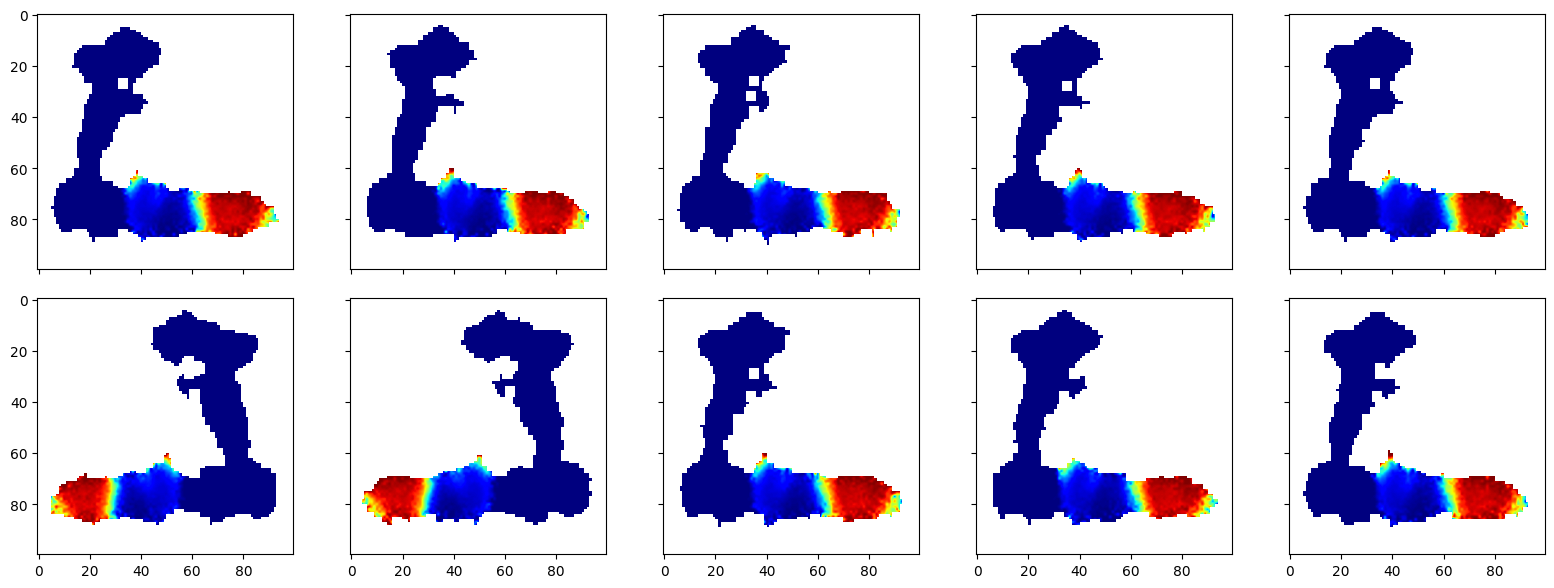

In [73]:
fig,ax=plt.subplots(2,5,figsize=(16,6), sharex=True, sharey=True)
plt.tight_layout()
ax=np.concatenate((ax))
for a,hh in enumerate(hists):
    ax[a].imshow(hh[0], vmin=0, vmax=1, cmap='jet', interpolation='gaussian')
plt.show()

In [74]:
ce = [
    [
        nh.classification_extent(j, cutoff=0.1, strategy='weighted',
                                output_type='jm', operation=2, jm_lower=t4l_weight, jm_impure=t4l_impure)
    for j in i]
for i in hists]
ce = np.mean(ce, axis=1), np.std(ce, axis=1)

(0.6, 0.8)

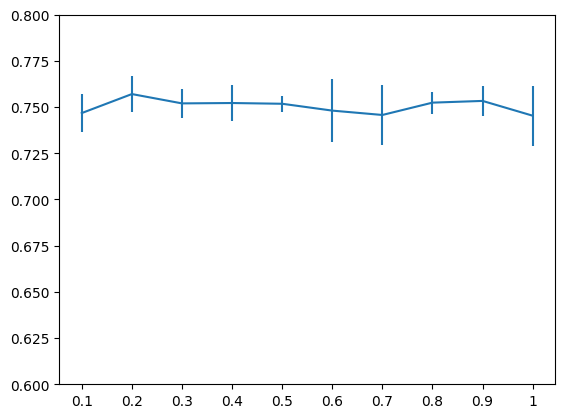

In [75]:
fig,ax=plt.subplots(1)
ax.errorbar(sizes, ce[0], yerr=ce[1])
ax.set_ylim(0.6,0.8)

### for pmt_data_size=0.1

In [27]:
hists = []
ce = []
fimp = np.load(f'2_fp2/saved_fp/fimp_0.1.npy')
for f in fimp:
    f = f.argsort()[::-1][:200]
    tic2 = [t[:,f] for t in traj_data]
    tic2 = coor.tica(tic2, lag=700, dim=2).get_output()[0]
    hh = nh.hist_range(tic2, dists0, mini=0, maxi=0.6)[4]
    hists.append(hh)
    ce.append(nh.classification_extent(hh, cutoff=0.1, strategy='weighted',
                                      output_type='jm', operation=2, 
                                      jm_lower=t4l_weight, jm_impure=t4l_impure))
ce = np.array(ce)

In [28]:
#reference with all data
cref = 0.7528, 0.0074

<font size=3>
    error calculation: <br>
    $ cdiff = \frac{ce-cref}{cref }* 100 $ #percent diff in results <br>
    <br>
    $\Delta cdiff = \sqrt{\frac{\delta cdiff}{\delta ce}\Delta ce + \frac{\delta cdiff}{\delta cref}\Delta cref }$ <br>
    \Delta ce is 0, hence first component is zero <br>
    $ \frac {\delta} {\delta cref} (\frac{ce-cref}{cref }* 100) = -100\frac{ce}{cref^2} $ <br>
    $ \Delta cdiff = \sqrt{100 \frac{ce}{cref^2}\Delta cref} $

In [29]:
cdiff = (ce-cref[0])/cref[0] * 100
cdiff

array([-0.56795209, -0.13564681,  0.38480845, -3.49071575, -0.19855035])

In [31]:
cerr = np.sqrt(100 * ce/(cref[0]**2) * cref[1])
cerr

array([0.98864243, 0.99078929, 0.99336774, 0.97400369, 0.99047719])

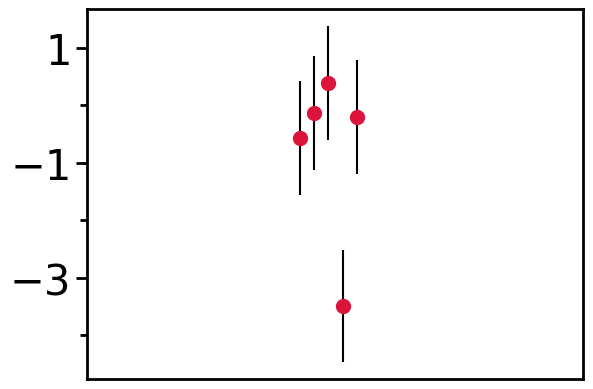

In [49]:
fig,ax=plt.subplots()
ax.errorbar(range(5), cdiff, yerr=cerr, fmt='o', color='crimson', ecolor='black', ms=10)
ax.set_xlim(-15,20)
ax.spines[:].set_linewidth(2)
ax.set_yticks([-3,-1,1])
ax.tick_params(labelsize=30, length=8, width=2, labelbottom=False, bottom=False)
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=5, width=2)
plt.savefig('plots/percent_diff_fp.pdf')
plt.show()